# <font color='red'>This file must be executed only after Pandarinath_TelecomChurnCaseStudy.ipynb is executed.</font>
The complete solution is spred in multiple files:
1. File-1: "Pandarinath_TelecomChurnCaseStudy.ipynb"
        It comprises of cleaning of data and EDA
           
2. File-2: "Pandarinath_TelecomChurnCaseStudy_Modelling_PCA_LR.ipynb"
        It comprises of execution of SOMTE to balance data, PCA for feature selection and finally LR model

3. File-3: "Pandarinath_TelecomChurnCaseStudy_Modelling_RFE_LR.ipynb"

4. File-4: "Pandarinath_TelecomChurnCaseStudy_Modelling_LASSO_DT.ipynb"

5. File-5: "Pandarinath_TelecomChurnCaseStudy_Modelling_LASSO_RF.ipynb"

# <font color='blue'>Telecom Churn Case Study</font>
* Institution: IIIT, Bangalore and UpGrad
* Course: PG Diploma in Machine Lerning and AI March 2018
* Date: 13-Aug-2018
* Submitted by:
    1. Pandinath Siddineni (ID- APFE187000194)
    2. AKNR Chandra Sekhar (ID- APFE187000315)
    3. Brajesh Kumar       (ID- APFE187000149)
    4. Shweta Tiwari


### <font color='blue'>Business Goals:</font>
1. Retaining high profitable customers is the number one business goal.
2. This project is based on the Indian and Southeast Asian market.
3. In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.
4. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

### <font color='blue'>Analysis Goals:</font>
1. Predict which customers are at high risk of churn
2. Build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
3. Prepaid is the most common model in India and southeast Asia. Focus on prepaid customers.
3. Curn definition used-- "Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time." In this project, we will use the usage-based definition to define churn.
4. In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.
5. especially high-value customers go through  three phases of customer lifecycle: a. The ‘good’ phase, b. The ‘action’ phase, c. The ‘churn’ phase
---------------------------

## <font color='blue'>PART 1: DATA UNDERSTANDING AND CLEANING</font>

1. Understand the properties of loaded dataframe
2. Idnetify Uniquness key
3. Identify bad colums that has no infromation (all entries are null or same)
4. Conver dates to meaningful number of days
5. Remove columns with data that does not make much sense for our analysis
6. Missing value treatment: replace with '0', mean or median; drop rows; drop columns
7. Outlier Treatment
8. Write data into a clean data file. This will be used to create master-df for analysis

### Import libraries and load datafile

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Until fuction: line seperator
def print_ln():
    print('-'*80, '\n')
    
pd.options.display.float_format = '{:.2f}'.format

# Load csv data file
telecom_orig = pd.read_csv('telecom_churn_data_clean.csv', low_memory=False)

In [2]:
# Understand the properties of loaded dataframe
telecom = telecom_orig.copy()
print('Dataframe Shape: ', telecom.shape); print_ln();
print("Dataframe Info: \n"); telecom.info(); print_ln();
telecom.head(5)

Dataframe Shape:  (28504, 144)
-------------------------------------------------------------------------------- 

Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28504 entries, 0 to 28503
Columns: 144 entries, mobile_number to rech_days_left_8
dtypes: float64(105), int64(39)
memory usage: 31.3 MB
-------------------------------------------------------------------------------- 



,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn,rech_days_left_6,rech_days_left_7,rech_days_left_8
0,7000701601,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0,0.00,0.00,0.00,1,3.00,6.00,5.00
1,7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,...,1,0,1,0.00,354.00,207.00,0,5.00,0.00,1.00
2,7002124215,514.45,597.75,637.76,102.41,132.11,85.14,757.93,896.68,983.39,...,0,0,0,0.00,0.00,0.00,0,0.00,0.00,0.00
3,7000887461,74.35,193.90,366.97,48.96,50.66,33.58,85.41,89.36,205.89,...,1,0,1,0.00,712.00,540.00,0,12.00,24.00,7.00
4,7000149764,977.02,2362.83,409.23,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,1,5285.00,20424.00,455.00,0,0.00,1.00,5.00


In [3]:
# Drop mobile number
telecom.drop('mobile_number', axis=1, inplace=True)

## Create X, y variables

In [4]:
X = telecom.drop(['churn'],axis=1)
y = telecom['churn']

## Applying standard scale

In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


scaler = preprocessing.StandardScaler().fit(X)

Xscaled = scaler.transform(X)

## Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, train_size=0.7,random_state=42)

C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:
print(X_train.shape)
print(X_test.shape)

(19952, 142)
(8552, 142)


In [8]:
print("X_train Dataframe Shape {}".format(X_train.shape))
print("X_test Dataframe Shape {}".format(X_test.shape))

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data: {}".format(y_train_imb))
print("Imbalance in Test Data: {}".format(y_test_imb))

X_train Dataframe Shape (19952, 142)
X_test Dataframe Shape (8552, 142)
Imbalance in Train Data: 0.0613895095222896
Imbalance in Test Data: 0.054500616522811345


# Applying smote

In [9]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)
np.count_nonzero(y_tr)

(37596, 142)
(37596,)


18798

In [10]:
print("X_tr Dataframe Shape {}".format(X_tr.shape))
print("y_tr Dataframe Shape {}".format(y_tr.shape))

data_imbalance = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data: {}".format(data_imbalance))

X_tr Dataframe Shape (37596, 142)
y_tr Dataframe Shape (37596,)
Imbalance in Train Data: 1.0


# Applying PCA

In [11]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_tr)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
df_train_pca = pca.fit_transform(X_tr)
print(df_train_pca.shape)

df_test_pca = pca.transform(X_test)
print(df_test_pca.shape)

(37596, 142)
(8552, 142)


# Apply logistic regression

In [13]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(df_train_pca, y_tr)

# Predicted probabilities
y_pred = logsk.predict(df_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [14]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[6668 1442]
 [  83  359]]


In [15]:
print("LogisticRegression accuracy with PCA: ",accuracy_score(y_test,y_pred))

LogisticRegression accuracy with PCA:  0.8216791393826005


In [16]:
pca.components_

array([[ 1.45819310e-01,  1.43660422e-01,  9.35753651e-02, ...,
        -7.52974278e-02, -5.49848028e-02, -3.26576148e-02],
       [ 8.85973032e-02,  1.14066753e-01,  1.55896768e-01, ...,
         2.37892577e-02, -1.49781768e-02, -1.40445903e-02],
       [ 6.69289529e-02,  6.59515168e-02,  7.37439499e-02, ...,
         3.26909352e-02,  4.41484132e-02,  1.09180200e-02],
       ...,
       [-1.46530142e-16,  1.32537609e-16,  1.28073485e-16, ...,
         3.77532260e-17, -1.10416445e-17, -1.56102889e-17],
       [ 2.14615240e-16, -1.07054968e-16,  5.03222913e-18, ...,
        -2.10671189e-18,  2.44028754e-17,  5.63878461e-17],
       [ 0.00000000e+00, -1.92624939e-16,  7.88928410e-19, ...,
        -3.23061727e-17, -2.03907165e-19,  3.23106414e-17]])

In [17]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':colnames})
pcs_df.head(10)

,Feature,PC1,PC2,PC3
0,arpu_6,0.15,0.09,0.07
1,arpu_7,0.14,0.11,0.07
2,arpu_8,0.09,0.16,0.07
3,onnet_mou_6,0.17,-0.04,-0.06
4,onnet_mou_7,0.17,-0.02,-0.06
5,onnet_mou_8,0.11,0.03,-0.03
6,offnet_mou_6,0.20,0.03,0.01
7,offnet_mou_7,0.20,0.06,0.01
8,offnet_mou_8,0.12,0.10,0.01
9,roam_ic_mou_6,0.02,-0.00,0.36


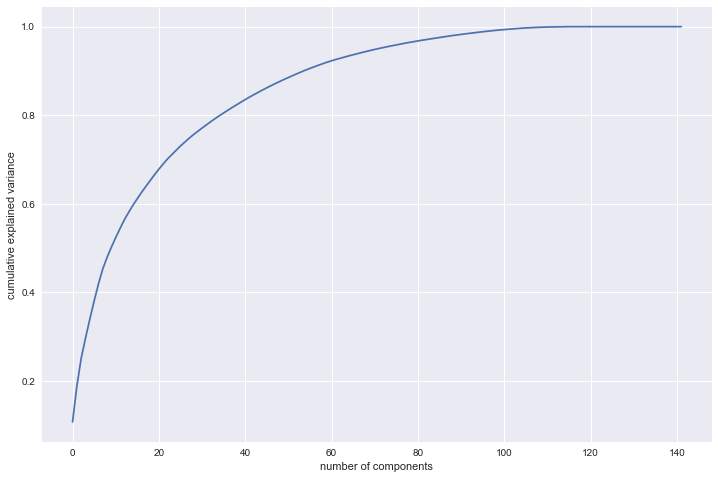

In [18]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [19]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([10.73, 18.87, 25.12, 29.67, 33.97, 38.05, 41.9 , 45.3 , 47.9 ,
       50.23, 52.37, 54.41, 56.38, 58.07, 59.68, 61.16, 62.6 , 63.95,
       65.26, 66.56, 67.8 , 68.99, 70.11, 71.1 , 72.07, 73.03, 73.92,
       74.77, 75.59, 76.35, 77.08, 77.8 , 78.51, 79.2 , 79.85, 80.49,
       81.12, 81.73, 82.33, 82.92, 83.5 , 84.07, 84.61, 85.14, 85.66,
       86.17, 86.66, 87.14, 87.61, 88.06, 88.5 , 88.93, 89.35, 89.76,
       90.16, 90.55, 90.92, 91.28, 91.62, 91.95, 92.26, 92.55, 92.83,
       93.1 , 93.37, 93.63, 93.88, 94.13, 94.37, 94.6 , 94.83, 95.04,
       95.25, 95.45, 95.65, 95.85, 96.04, 96.23, 96.41, 96.58, 96.75,
       96.91, 97.07, 97.22, 97.37, 97.52, 97.67, 97.82, 97.96, 98.09,
       98.22, 98.34, 98.46, 98.58, 98.7 , 98.81, 98.92, 99.03, 99.13,
       99.22, 99.31, 99.39, 99.47, 99.54, 99.61, 99.67, 99.73, 99.78,
       99.82, 99.86, 99.89, 99.91, 99.93, 99.94, 99.95, 99.96, 99.96,
       99.96, 99.96, 99.96, 99.96, 99.96, 99.96, 99.96, 99.96, 99.96,
       99.96, 99.96,

# Apply logistic regression with 48 columns (90% explained variance)

In [20]:
pca48 = PCA(n_components=48)

In [21]:
df_train_pca48 = pca48.fit_transform(X_tr)
print(df_train_pca48.shape)
df_test_pca48 = pca48.transform(X_test)
print(df_test_pca48.shape)

(37596, 48)
(8552, 48)


In [22]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk1 = LogisticRegression(C=1e9)
logsk1.fit(df_train_pca48, y_tr)

# Predicted probabilities
y_pred48 = logsk1.predict(df_test_pca48)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred48)

In [23]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred48))

[[6632 1478]
 [  80  362]]


In [24]:
print("LogisticRegression accuracy with PCA: ",accuracy_score(y_test,y_pred48))

LogisticRegression accuracy with PCA:  0.817820392890552


# <font color='blue'>SUMMARY PART 3: PCA with Logistic Regression</font>

OBSERVATIONS
1. Data is higly imbalanced only 5.6% data is churn & remaining is non_churn
2. SMOTE is applied to balance data
3. 82% accuracy with default PCA
4. 90% variance can be explained with 48 columns and maintain 82% accuracy
5. Key features are arpu_6, arpu_7, arpu_8, onnet_mou_6, onnet_mou_7, onnet_mou_8, offnet_mou_6, offnet_mou_7, offnet_mou_8, roam_ic_mou_6

NEXT STEPS:
1. Run other models with LASSO and RFE